# Global warming levels

Tim Raupach <<t.raupach@unsw.edu.au>>

This notebook contains code to calculate the mean warming over a baseline temperature for a given year range in CMIP5 or CMIP6 experiments. The calculation is as follows:

1. Monthly global mean temperatures are sourced from [IPCC Repository supporting the implementation of FAIR principles in the IPCC-WG1 Atlas](https://github.com/IPCC-WG1/Atlas) (CC-BY-4.0).
2. For a given project (CMIP5/CMIP6) and experiment (RCP8.5, SSP5-8.5 etc), all monthly global mean temperatures are read. The variable is near-surface temperature (`tas`), which is available averaged by region and globally.
3. The mean global temperature (over time) is calculated per model using monthly values, for the baseline and future periods/experiments respectively.
4. Changes are calculated per model as future minus baseline. Only models with values for both future and baseline periods are kept.
5. The average of changes across models is the resulting change.

In the following plots grey lines are annual average temperature for each individual model, and the red line is the annual multimodel mean. The lighter grey lines are for the entire future projection, while the darker grey lines are for the baseline period of the baseline model run. The green region shows the baseline period. The yellow region is the future period. The mean change is shown in the plot title and returned by the function `warming_for_period`.

## Similar implementations
* [Mathias Hauser, Francois Engelbrecht, and Erich Fischer](https://github.com/mathause/cmip_warming_levels) have code for calculating the year on which a given warming is reached.
* Similarly, the [IPCC Atlas](https://github.com/IPCC-WG1/Atlas/tree/main/warming-levels) also has code to calculate the year on which a given warming is reached.

## Data sources
Temperature data is from the IPCC Atlas github (CC-BY-4.0):

> Iturbide, M., Fernández, J., Gutiérrez, J.M., Bedia, J., Cimadevilla, E., Díez-Sierra, J., Manzanas, R., Casanueva, A., Baño-Medina, J., Milovac, J., Herrera, S., Cofiño, A.S., San Martín, D., García-Díez, M., Hauser, M., Huard, D., Yelekci, Ö. (2021) Repository supporting the implementation of FAIR principles in the IPCC-WG1 Atlas. Zenodo, DOI: 10.5281/zenodo.3691645. Available from: https://github.com/IPCC-WG1/Atlas 


In [1]:
%cd ~/git/warming_levels
import modules.warming_levels as wl

/home/561/tr2908/git/warming_levels


An example - show mean warming for CMIP5 RCP8.5 2070-2090 compared to 1986-2006 from the historical run:

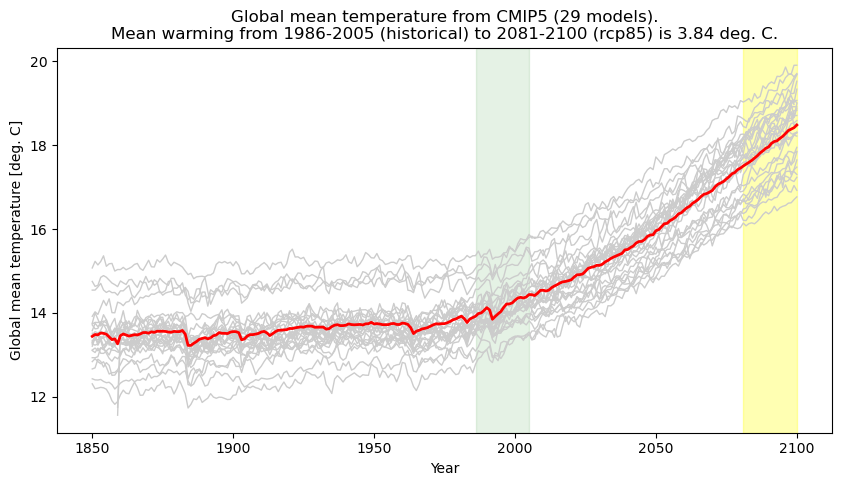

In [2]:
_ = wl.warming_amount(project='CMIP5', baseline_experiment='historical', baseline_range=[1986, 2005],
                      future_experiment='rcp85', future_range=[2081, 2100])

The same period in CMIP6 with SSP2-4.5:

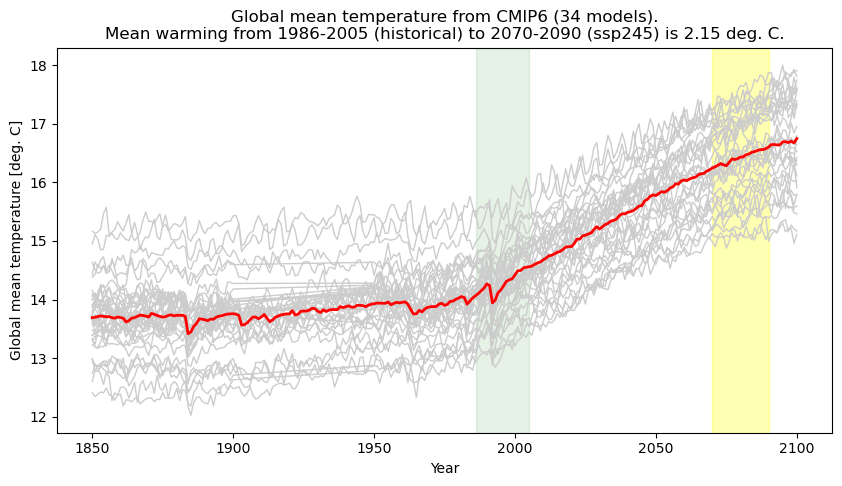

In [3]:
_ = wl.warming_amount(project='CMIP6', baseline_experiment='historical', baseline_range=[1986, 2005],
                      future_experiment='ssp245', future_range=[2070, 2090])

And CMIP6 SSP1-2.6 vs preindustrial temperatures:

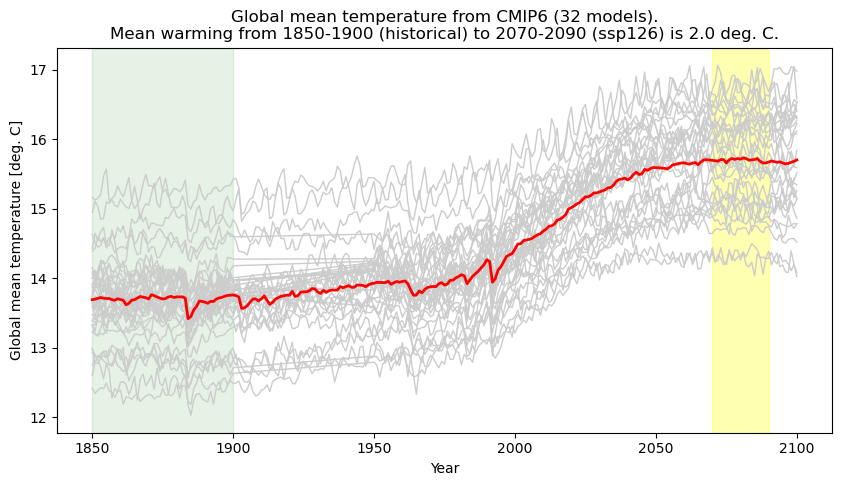

In [4]:
_ = wl.warming_amount(project='CMIP6', baseline_experiment='historical', baseline_range=[1850, 1900],
                      future_experiment='ssp126', future_range=[2070, 2090])

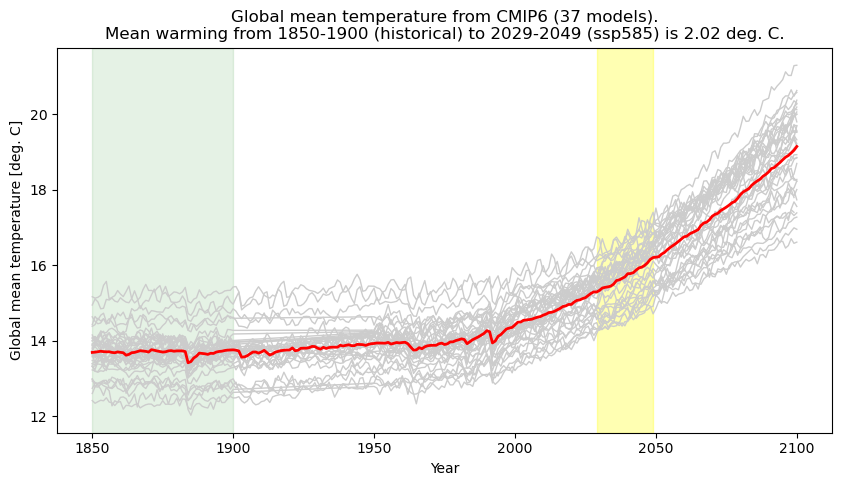

In [5]:
_ = wl.warming_amount(project='CMIP6', baseline_experiment='historical', baseline_range=[1850, 1900],
                      future_experiment='ssp585', future_range=[2029, 2049])

## Annual changes in observed temperature data

Using BEST historical data we can also determine the mean amount of warming for a given period - note here this is the mean of monthly anomalies:

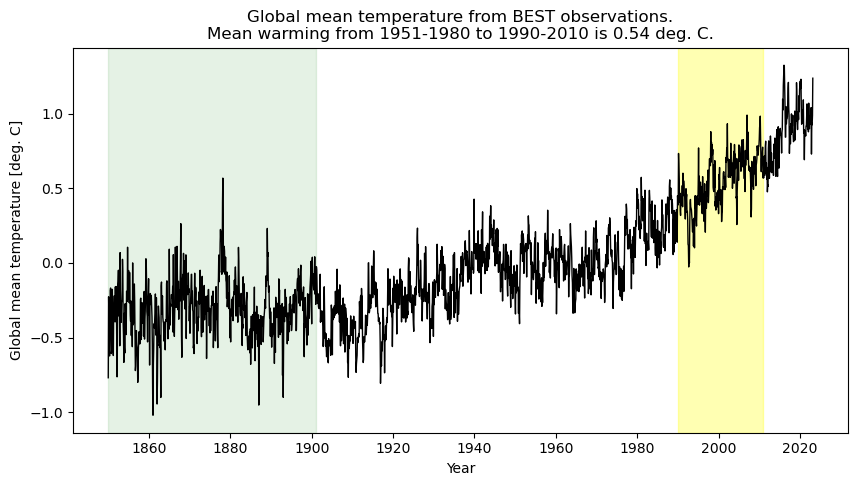

0.5421904761904762

In [6]:
wl.obs_anomaly(year_range=[1990, 2010])

The warming for the reference period is not zero, which I assume is because I'm taking the mean of monthly anomalies (not the 30-year anomaly for that time period). 

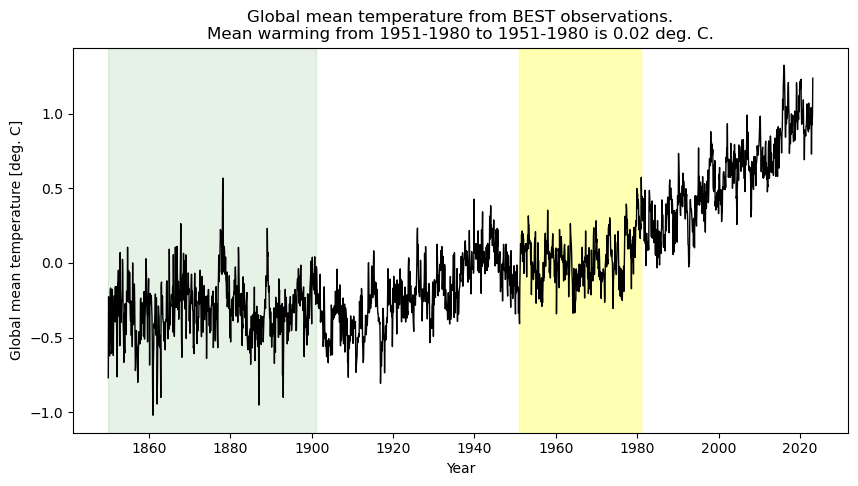

0.017355555555555555

In [7]:
wl.obs_anomaly(year_range=[1951, 1980])

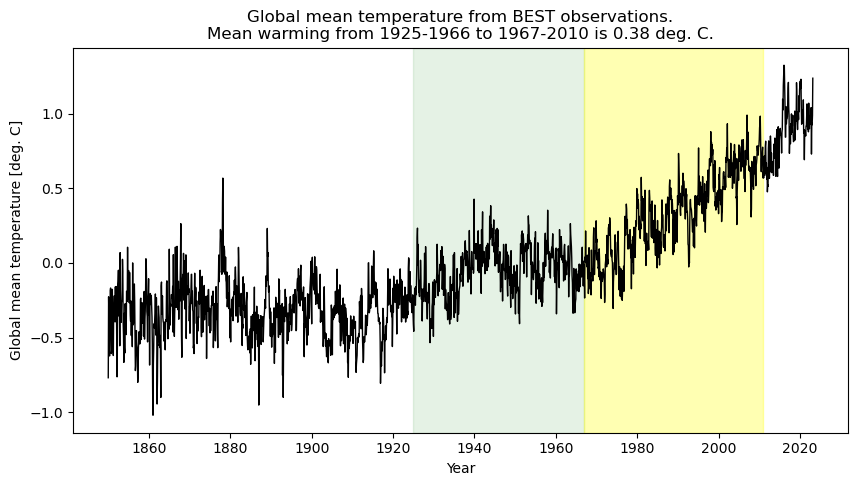

0.3803286435786436

In [8]:
wl.obs_warming(from_range=[1925,1966], to_range=[1967,2010])

## Years when warming levels are reached

We can also calculate the 20 year window in which a given warming level is first reached, following the method set out by [Hauser, Engelbrecht, and Fischer](https://github.com/mathause/cmip_warming_levels/blob/main/README.md).

In [9]:
wl.warming_window(warming_amount=1, project='CMIP6', baseline_range=[1850,1900], 
                  baseline_experiment='historical', future_experiment='ssp585')

,start_year,end_year
model,,
ACCESS-CM2_r1i1p1f1,2005,2024
ACCESS-CM2_r4i1p1f1,2003,2022
ACCESS-ESM1-5_r1i1p1f1,2004,2023
AWI-CM-1-1-MR_r1i1p1f1,1993,2012
BCC-CSM2-MR_r1i1p1f1,2008,2027
CAMS-CSM1-0_r2i1p1f1,2023,2042
CESM2-WACCM_r1i1p1f1,1997,2016
CESM2_r4i1p1f1,2000,2019
CMCC-CM2-SR5_r1i1p1f1,1993,2012


In [10]:
wl.warming_window(warming_amount=0.94, project='CMIP6', baseline_range=[1995,2014], 
                  baseline_experiment='historical', future_experiment='ssp585')

,start_year,end_year
model,,
ACCESS-CM2_r1i1p1f1,2018,2037
ACCESS-CM2_r4i1p1f1,2021,2040
ACCESS-ESM1-5_r1i1p1f1,2024,2043
AWI-CM-1-1-MR_r1i1p1f1,2029,2048
BCC-CSM2-MR_r1i1p1f1,2024,2043
CAMS-CSM1-0_r2i1p1f1,2039,2058
CESM2-WACCM_r1i1p1f1,2021,2040
CESM2_r4i1p1f1,2021,2040
CMCC-CM2-SR5_r1i1p1f1,2025,2044


## Code to calculate global mean monthly temperatures

... and save them into the `data/CMIP6_tas_landsea_local` directory.

In [11]:
# CMCC-ESM2
# wl.monthly_mean_temps(desc='CMIP6.CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1')
# wl.monthly_mean_temps(desc='CMIP6.ScenarioMIP.CMCC.CMCC-ESM2.ssp585.r1i1p1f1')

# # ACCESS-CM2
# wl.monthly_mean_temps(desc='CMIP6.CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.r4i1p1f1', CMIP6_dir='/g/data/fs38/publications')
# wl.monthly_mean_temps(desc='CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r4i1p1f1', CMIP6_dir='/g/data/fs38/publications')

# # GISS-E2-1-G
# wl.monthly_mean_temps(desc='CMIP6.CMIP.NASA-GISS.GISS-E2-1-G.historical.r1i1p1f2')
# wl.monthly_mean_temps(desc='CMIP6.ScenarioMIP.NASA-GISS.GISS-E2-1-G.ssp585.r1i1p1f2')